## Filtros Anisotrópicos

En todo lo que trata con gráficos por computadora, los filtros anisotrópicos juegan un papel crucial para mejorar la calidad de las imágenes, especialmente en texturas que se observan desde ángulos oblicuos. A diferencia de filtros como el Gaussian Blur, que difuminan uniformemente la imagen, los filtros anisotrópicos adaptan su efecto según la orientación de la textura, preservando los detalles y reduciendo el aliasing de manera más inteligente.

##### ¿Qué los diferencia del Gaussian Blur?

La principal diferencia radica en su enfoque. El Gaussian Blur aplica una convolución con un kernel circular sobre la imagen, difuminando los bordes y detalles por igual en todas las direcciones. Esto puede ser útil para suavizar la imagen general, pero no distingue entre detalles importantes y texturas irrelevantes.

En cambio, los filtros anisotrópicos analizan la orientación de la textura y adaptan el proceso de filtrado en consecuencia. De esta manera, pueden preservar los detalles finos en direcciones paralelas a la textura, mientras que difuminan suavemente los bordes irregulares en direcciones perpendiculares. Esto resulta en texturas más nítidas y realistas, especialmente cuando se observan desde ángulos oblicuos.

##### Funcionamiento del Filtro Anisotrópico de Perona-Malik:

Uno de los filtros anisotrópicos más conocidos es el de Perona-Malik, que se basa en la difusión no lineal. Este enfoque simula la difusión de calor en un material anisotrópico, donde la conductividad térmica depende de la orientación del material.

En el contexto de las texturas, el filtro de Perona-Malik asigna diferentes pesos a los píxeles vecinos según su orientación relativa a la textura. Los píxeles que se encuentran en la dirección de la textura tienen un peso mayor, lo que permite preservar los detalles finos. Por otro lado, los píxeles en direcciones perpendiculares tienen un peso menor, lo que contribuye a difuminar los bordes irregulares.

##### Implementación y Beneficios:

La implementación del filtro de Perona-Malik implica la resolución de una ecuación diferencial que describe la difusión del calor anisotrópico. Esta ecuación se resuelve iterativamente, ajustando los valores de los píxeles de acuerdo a las interacciones con sus vecinos.

##### Los beneficios del uso de filtros anisotrópicos como el de Perona-Malik son notables:

Texturas más nítidas y realistas, especialmente desde ángulos oblicuos.
Reducción del aliasing en bordes y detalles finos.
Mejora general de la calidad de la imagen.


## Problema 2

Descargar la base de datos BSD500, de Berkeley,  la cual originalmente es una base de datos para evaluar algoritmos de segmentación. En esta ocasión únicamente usaremos la base para generar imágenes a las que aplicaremos filtros anisotrópicos.

In [1]:
#!python3 download_imgs.py

## Problema 3

Convertir las imágenes del dataset a escala de grises, y luego, a cada una, aplicar el filtro anisotrópico. Se sugiere utilizar los parámetros:

```python
niter=50, kappa=20, gamma=0.2, step=(1.,1.), option=1, ploton=False.


In [2]:
import os
import cv2
from Anisotropic import anisodiff

def aplicar_filtro_anisotropico(directorio_imagenes, directorio_salida):
    if not os.path.exists(directorio_salida):
        os.makedirs(directorio_salida)

    archivos = os.listdir(directorio_imagenes)

    # Parámetros del filtro anisotrópico
    niter = 50
    kappa = 20
    gamma = 0.2
    step = (1., 1.)
    option = 1
    ploton = False

    for archivo in archivos:
        if archivo.endswith(('.jpg', '.png')):
            ruta_completa_entrada = os.path.join(directorio_imagenes, archivo)
            ruta_completa_salida = os.path.join(directorio_salida, archivo)

            imagen = cv2.imread(ruta_completa_entrada)
            # Aplicar el filtro anisotrópico
            imagen_filtrada = anisodiff(imagen, niter=niter, kappa=kappa, gamma=gamma, step=step, option=option, ploton=ploton)
            cv2.imwrite(ruta_completa_salida, imagen_filtrada)

directorio_imagenes = './Descargas_BSDS500/imgs'
directorio_salida = './Descargas_BSDS500/filtered'
aplicar_filtro_anisotropico(directorio_imagenes, directorio_salida)

c:\Users\juanc\Desktop\UVG\Clases\VPC\Lab03_VC_UVG\Anisotropic.py:65: UserWarning: Only grayscale images allowed, converting to 2D matrix
  warnings.warn("Only grayscale images allowed, converting to 2D matrix")


## Problema 4

De la colección de pares (I<sub>i</sub>, F<sub>i</sub>) (imagen original, imagen filtrada), producir una colección de muestras (x<sub>i</sub>, y<sub>i</sub>), donde

<center>x<sub>i</sub> = ventana de tamaño k × k, en la imagen original y<sub>i</sub> = ventana de tama˜no k × k, en la imagen filtrada</center>

ambas ventanas deben corresponder a la misma región (salvo que x<sub>i</sub> viene de la imagen original I, mientras que la yi es la misma región pero tomada de la imagen filtrada.

La posición de la ventana puede ser tomada de forma aleatoria siempre que se encuentre dentro de la imagen. El tamaño k × k de las ventanas es un parámetro que ustedes deben decidir.
Sugerencia: usar potencias de 2, por ejemplo: 16 × 16, 32 × 32 ó 64 × 64.

Construir una base de datos de pares (x<sub>i</sub>, y<sub>i</sub>) de ventanas. Considere un número bastante amplio de estas ventanas. E.g. N = 5 × $10^{5}$ o más. Separar estas ventanas en un conjunto de entrenamiento, otro de validación, y otro de prueba.



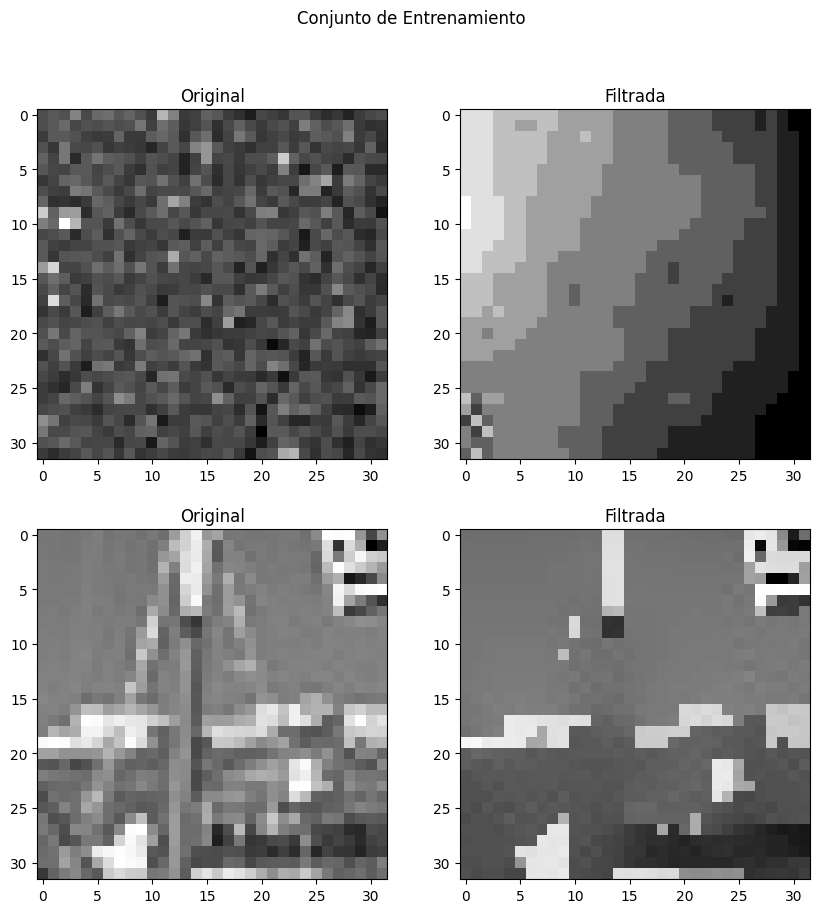

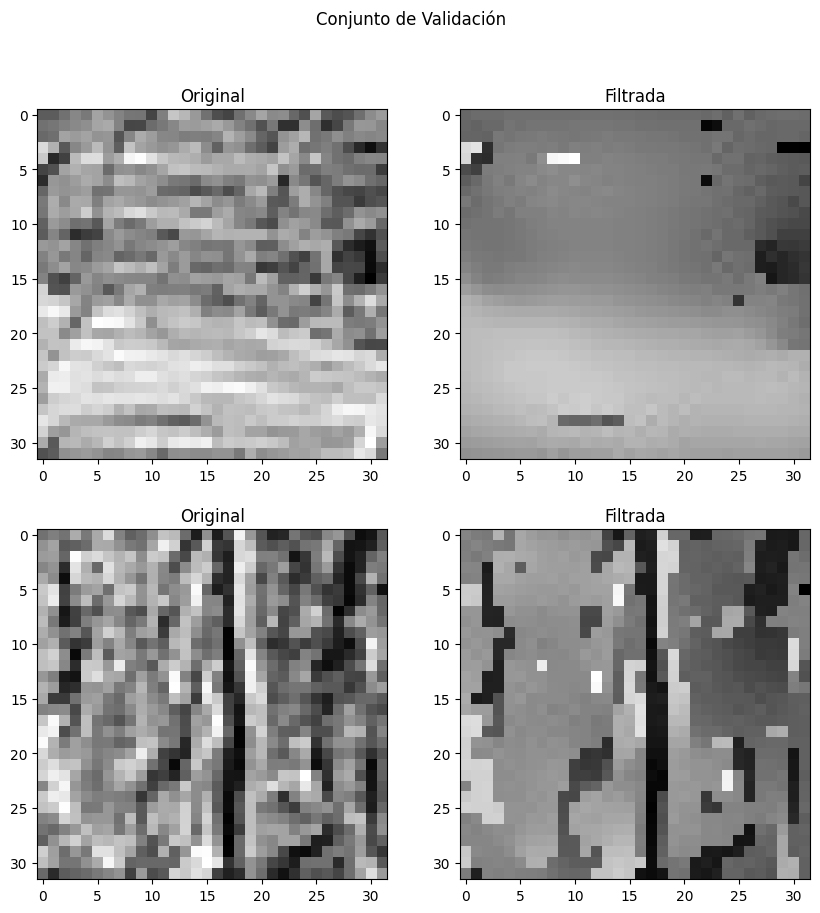

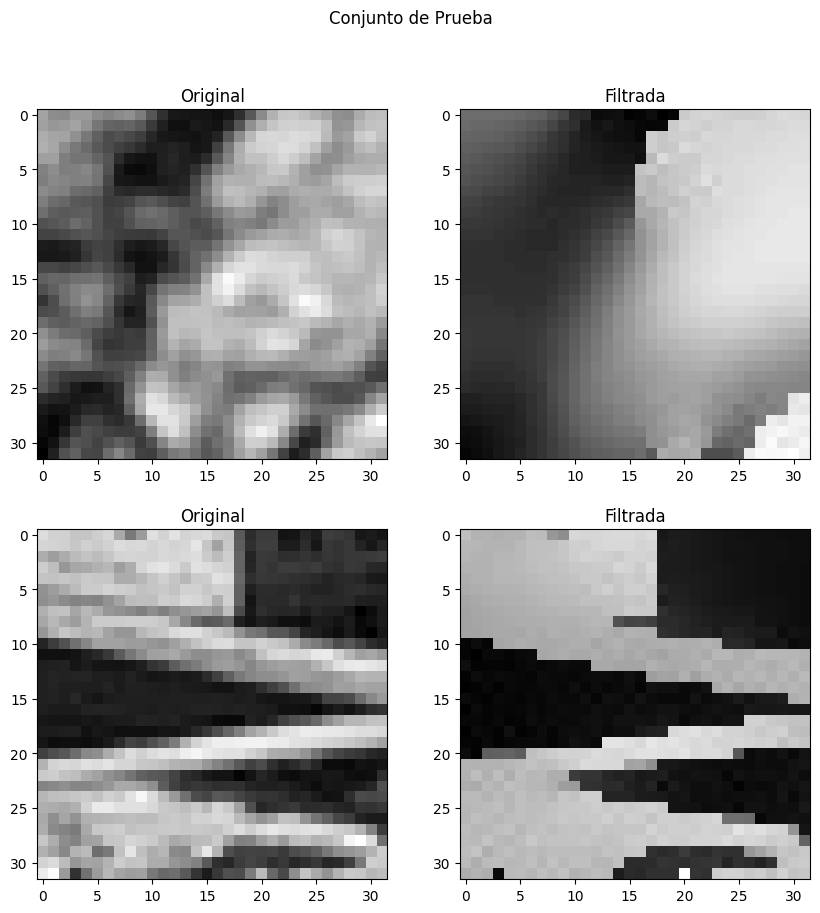

Conjunto de entrenamiento: (120000, 32, 32) (120000, 32, 32)
Conjunto de validación: (40000, 32, 32) (40000, 32, 32)
Conjunto de prueba: (40000, 32, 32) (40000, 32, 32)


In [3]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

def extraer_ventanas_pareadas(img, filtered_img, k=32, num_ventanas=10):
    max_x, max_y = img.shape[0] - k, img.shape[1] - k
    x_ventanas = []
    y_ventanas = []
    for _ in range(num_ventanas):
        x = np.random.randint(0, max_x)
        y = np.random.randint(0, max_y)
        ventana_img = img[x:x+k, y:y+k]
        ventana_filtered_img = filtered_img[x:x+k, y:y+k]
        x_ventanas.append(ventana_img)
        y_ventanas.append(ventana_filtered_img)
    return x_ventanas, y_ventanas

def cargar_imagenes_y_extraer_ventanas(directorio_imgs, directorio_filtered, k=32, num_ventanas=10):
    x_data = []
    y_data = []
    archivos = os.listdir(directorio_imgs)
    for archivo in archivos:
        if archivo.endswith('.jpg') or archivo.endswith('.png'):
            img_path = os.path.join(directorio_imgs, archivo)
            filtered_path = os.path.join(directorio_filtered, archivo)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            filtered_img = cv2.imread(filtered_path, cv2.IMREAD_GRAYSCALE)
            x_ventanas, y_ventanas = extraer_ventanas_pareadas(img, filtered_img, k, num_ventanas)
            x_data.extend(x_ventanas)
            y_data.extend(y_ventanas)
    return np.array(x_data), np.array(y_data)

# Definición de directorios
directorio_imgs = './Descargas_BSDS500/imgs'
directorio_filtered = './Descargas_BSDS500/filtered'

# Extraer datos
x_data, y_data = cargar_imagenes_y_extraer_ventanas(directorio_imgs, directorio_filtered, k=32, num_ventanas=1000)

# Dividir los datos
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2

def mostrar_ejemplos(x, y, title="Ejemplos"):
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))
    axs = axs.ravel()
    for i in range(0, 4, 2):
        axs[i].imshow(x[i // 2], cmap='gray')
        axs[i].set_title('Original')
        axs[i+1].imshow(y[i // 2], cmap='gray')
        axs[i+1].set_title('Filtrada')
    plt.suptitle(title)
    plt.show()

# Mostrar ejemplos de cada conjunto
mostrar_ejemplos(x_train[:2], y_train[:2], "Conjunto de Entrenamiento")
mostrar_ejemplos(x_val[:2], y_val[:2], "Conjunto de Validación")
mostrar_ejemplos(x_test[:2], y_test[:2], "Conjunto de Prueba")
print("Conjunto de entrenamiento:", x_train.shape, y_train.shape)
print("Conjunto de validación:", x_val.shape, y_val.shape)
print("Conjunto de prueba:", x_test.shape, y_test.shape)


## Problema 5

Entrenar una red neuronal U-net (con 3 ó 4 niveles de profundidad), con los pares de ventanas (x<sub>i</sub>, y<sub>i</sub>) en el conjunto deentrenamiento. Calibrar los parámetros y refinar en entrenamiento de su red neuronal hasta que ustedes se sientan confiados en el desempeño de su red.

La red debe estar diseñada para recibir un stack de ventanas, o tensor de tamaño (?, k, k, 1), y la salida debe ser también un stack o tensor de ventanas de tamaño (?, k, k, 1).

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, BatchNormalization, Activation

from keras.callbacks import EarlyStopping, ReduceLROnPlateau

def unet(input_size=(32, 32, 1)):
    inputs = Input(input_size)
    # Down 1
    conv1 = Conv2D(32, 3, padding='same', kernel_initializer='he_normal')(inputs)
    conv1 = BatchNormalization()(conv1)
    conv1 = Activation('relu')(conv1)
    conv1 = Conv2D(32, 3, padding='same', kernel_initializer='he_normal')(conv1)
    conv1 = BatchNormalization()(conv1)
    conv1 = Activation('relu')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    # Down 2
    conv2 = Conv2D(64, 3, padding='same', kernel_initializer='he_normal')(pool1)
    conv2 = BatchNormalization()(conv2)
    conv2 = Activation('relu')(conv2)
    conv2 = Conv2D(64, 3, padding='same', kernel_initializer='he_normal')(conv2)
    conv2 = BatchNormalization()(conv2)
    conv2 = Activation('relu')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    # Middle
    conv3 = Conv2D(128, 3, padding='same', kernel_initializer='he_normal')(pool2)
    conv3 = BatchNormalization()(conv3)
    conv3 = Activation('relu')(conv3)
    conv3 = Conv2D(128, 3, padding='same', kernel_initializer='he_normal')(conv3)
    conv3 = BatchNormalization()(conv3)
    conv3 = Activation('relu')(conv3)

    # Up 2
    up2 = UpSampling2D(size=(2, 2))(conv3)
    up2 = concatenate([conv2, up2], axis=3)
    conv4 = Conv2D(64, 3, padding='same', kernel_initializer='he_normal')(up2)
    conv4 = BatchNormalization()(conv4)
    conv4 = Activation('relu')(conv4)
    conv4 = Conv2D(64, 3, padding='same', kernel_initializer='he_normal')(conv4)
    conv4 = BatchNormalization()(conv4)
    conv4 = Activation('relu')(conv4)

    # Up 1
    up1 = UpSampling2D(size=(2, 2))(conv4)
    up1 = concatenate([conv1, up1], axis=3)
    conv5 = Conv2D(32, 3, padding='same', kernel_initializer='he_normal')(up1)
    conv5 = BatchNormalization()(conv5)
    conv5 = Activation('relu')(conv5)
    conv5 = Conv2D(32, 3, padding='same', kernel_initializer='he_normal')(conv5)
    conv5 = BatchNormalization()(conv5)
    conv5 = Activation('relu')(conv5)

    # Output
    conv6 = Conv2D(1, 1, activation='sigmoid')(conv5)

    model = Model(inputs=[inputs], outputs=[conv6])
    return model

# Crear la red U-Net
model = unet()
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)


Epoch 1/5
3750/3750 [==============================] - 842s 224ms/step - loss: 14004.0225 - accuracy: 2.6042e-07 - val_loss: 14027.7646 - val_accuracy: 4.1504e-07 - lr: 0.0010
Epoch 2/5
3750/3750 [==============================] - 760s 203ms/step - loss: 14002.9980 - accuracy: 2.7669e-07 - val_loss: 14027.7588 - val_accuracy: 4.1504e-07 - lr: 0.0010
Epoch 3/5
3750/3750 [==============================] - 1023s 273ms/step - loss: 14002.9834 - accuracy: 2.7669e-07 - val_loss: 14027.7490 - val_accuracy: 3.6621e-07 - lr: 0.0010
Epoch 4/5
3750/3750 [==============================] - 989s 264ms/step - loss: 14002.9971 - accuracy: 2.7669e-07 - val_loss: 14027.7451 - val_accuracy: 3.6621e-07 - lr: 0.0010
Epoch 5/5
3750/3750 [==============================] - 1063s 284ms/step - loss: 14003.0049 - accuracy: 2.7669e-07 - val_loss: 14027.7451 - val_accuracy: 3.6621e-07 - lr: 0.0010
Model: "model"
__________________________________________________________________________________________________
 Lay

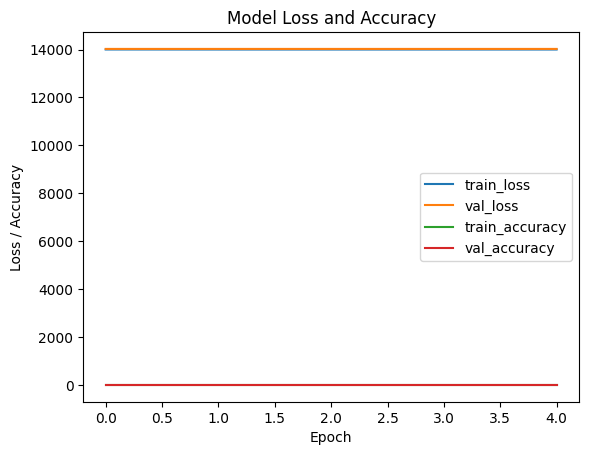

In [5]:
# Suponiendo que x_train, y_train, x_val, y_val están predefinidos como numpy arrays adecuados
# Asegúrate de que las imágenes tengan la forma correcta
x_train = np.expand_dims(x_train, axis=-1)
y_train = np.expand_dims(y_train, axis=-1)
x_val = np.expand_dims(x_val, axis=-1)
y_val = np.expand_dims(y_val, axis=-1)

# Entrenamiento
history = model.fit(x_train, y_train, 
          validation_data=(x_val, y_val), 
          epochs=5, 
          batch_size=32, 
          callbacks=[early_stopping, reduce_lr])

model.summary()

# Visualizar el progreso del entrenamiento
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Loss and Accuracy')
plt.ylabel('Loss / Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [6]:
model.save('unet_model_2.h5')

c:\Users\juanc\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Problema 6
La inferencia: Para hacer la inferencia sobre una imagen de test debe hacer un barrido de ventanas que cubra su imagen. El tamaño de estas ventanas debe coincidir con el tamaño k × k usando en el entrenamiento de la U-net.

Con estas ventanas, usted construirá un tensor (?, k, k, 1) que alimentará a la red neuronal. Posterior a la inferencia, la salida es de nuevo un tensor (?, k, k, 1) que corresponde a la colección de ventanas ya filtradas con el filtro anisotrópico.

Con este tensor de salida, deberá reconstruir la imagen filtrada, colocando cada ventana en su posición correspondiente de donde fue tomada. Los traslapes se deben resolver promediando los resultados de las diferentes ventanas que coincidan sobre un píxel.

5/5 [==============================] - 1s 67ms/step


C:\Users\juanc\AppData\Local\Temp\ipykernel_7680\2344031596.py:25: RuntimeWarning: invalid value encountered in divide
  imagen_reconstruida /= contador


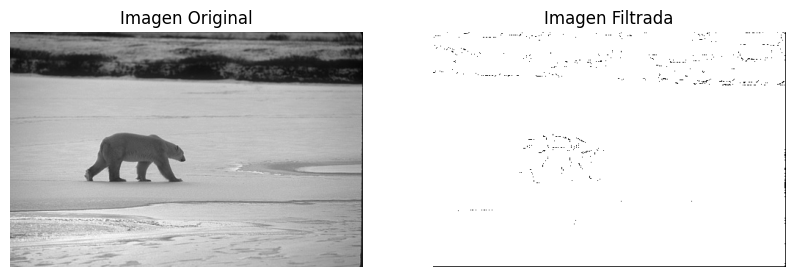

In [7]:
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import cv2

def dividir_en_ventanas(imagen, tamano_ventana):
    """Divide la imagen en ventanas de tamaño `tamano_ventana`."""
    ventanas = []
    posiciones = []
    alto, ancho = imagen.shape
    for y in range(0, alto, tamano_ventana):
        for x in range(0, ancho, tamano_ventana):
            ventana = imagen[y:y+tamano_ventana, x:x+tamano_ventana]
            if ventana.shape[0] == tamano_ventana and ventana.shape[1] == tamano_ventana:
                ventanas.append(ventana)
                posiciones.append((y, x))
    return np.array(ventanas), posiciones

def reconstruir_imagen(tamano_imagen, tamano_ventana, ventanas_filtradas, posiciones):
    """Reconstruye la imagen a partir de las ventanas filtradas."""
    imagen_reconstruida = np.zeros(tamano_imagen, dtype=np.float32)
    contador = np.zeros(tamano_imagen, dtype=np.float32)
    for ventana, (y, x) in zip(ventanas_filtradas, posiciones):
        imagen_reconstruida[y:y+tamano_ventana, x:x+tamano_ventana] += ventana
        contador[y:y+tamano_ventana, x:x+tamano_ventana] += 1
    imagen_reconstruida /= contador
    return np.clip(imagen_reconstruida, 0, 255).astype(np.uint8)

# Cargar el modelo entrenado
model = load_model('unet_model_2.h5')

# Cargar una imagen de test en escala de grises
imagen_test_path = './Descargas_BSDS500/imgs/100007.jpg'
imagen_test = cv2.imread(imagen_test_path, cv2.IMREAD_GRAYSCALE)

tamano_ventana = 32  # Debe ser el mismo tamaño que el utilizado durante el entrenamiento
ventanas, posiciones = dividir_en_ventanas(imagen_test, tamano_ventana)

ventanas = np.expand_dims(ventanas, axis=-1)
ventanas_predichas = model.predict(ventanas, batch_size=32)
imagen_reconstruida = reconstruir_imagen(imagen_test.shape, tamano_ventana, ventanas_predichas.squeeze(), posiciones)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Imagen Original')
plt.imshow(imagen_test, cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title('Imagen Filtrada')
plt.imshow(imagen_reconstruida, cmap='gray')
plt.axis('off')
plt.show()